<a href="https://colab.research.google.com/github/johnjustine5646/ComputerVision_Labs_Sem3/blob/main/CV_Lab5_2348522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ideal Low pass and Ideal High Pass filter in Fourier (Frequency) domain

In [19]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#original image
f=cv2.imread('/content/benchpark.jpg',0)

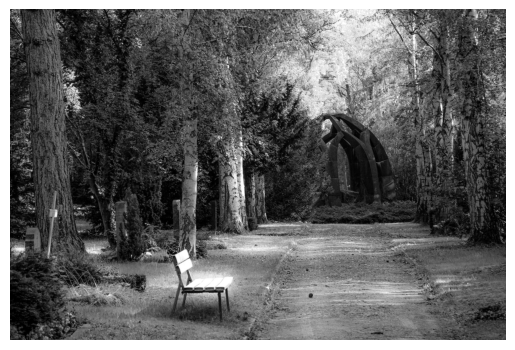

In [21]:
plt.imshow(f,cmap='gray',)
plt.axis('off')
plt.show()

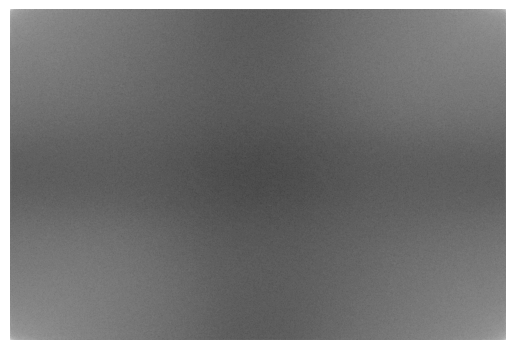

In [22]:
# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()


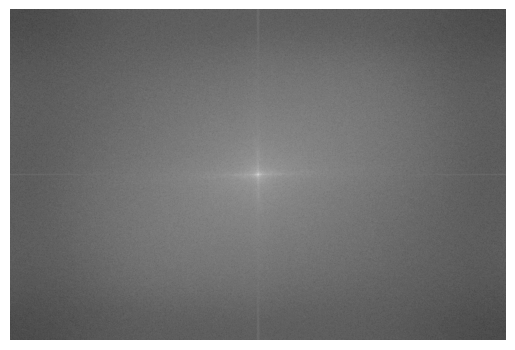

In [23]:
# Shifiting low frequency component to centere of the image
Fshift = np.fft.fftshift(F)
#calculate the magnitude of the Fourier Transform
#used to visualize the frequency content of an image
plt.imshow(np.log1p(np.abs(Fshift)),cmap="gray")
plt.axis('off')
plt.show()

In [24]:
f.shape

(1333, 2000)

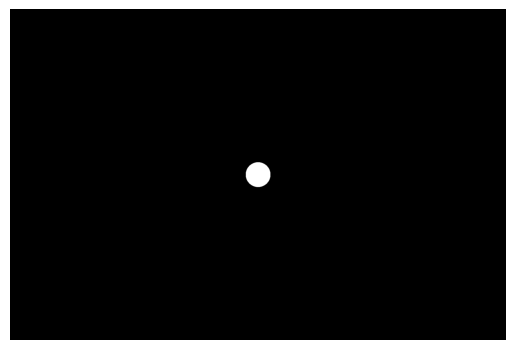

In [25]:
# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()


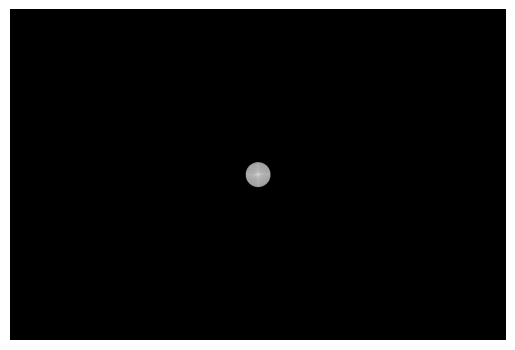

In [26]:
# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),
           cmap='gray')
plt.axis('off')
plt.show()


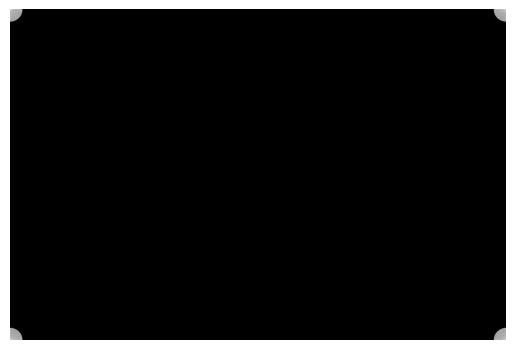

In [27]:
# Inverse the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),
           cmap='gray')
plt.axis('off')
plt.show()


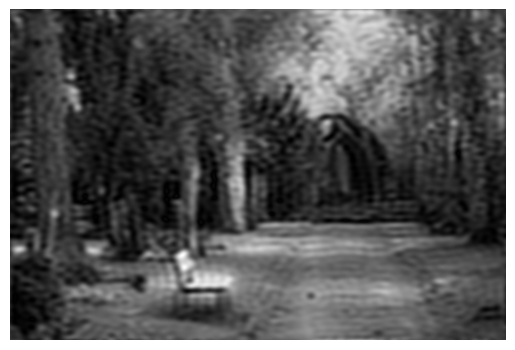

In [28]:
#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


In [29]:

# Filter: High pass filter
H = 1 - H


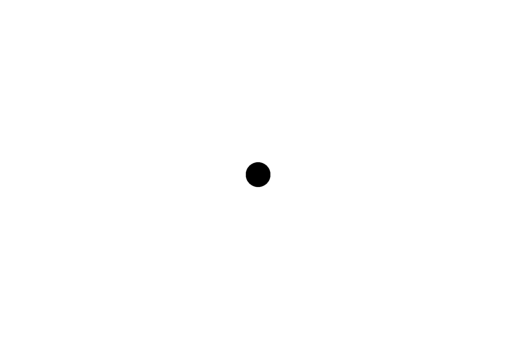

In [30]:
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()


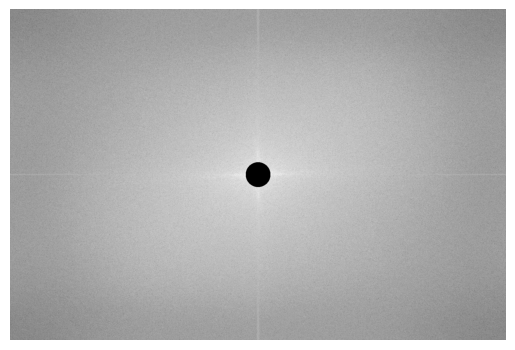

In [31]:
# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()


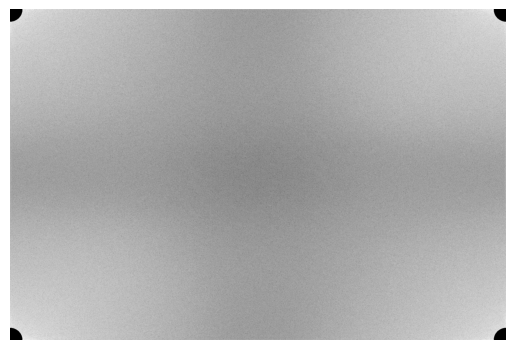

In [32]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()


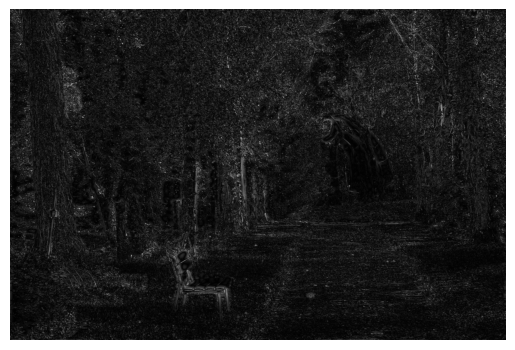

In [33]:

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()
